# `Hands-on` DL course

# Instalation

From base anaconda:

```
 pip install keras
```

This will install `keras` and `theano`.

In windows we have to configure `theano` use the windows compiler:

```
 conda install mingw libpython
```


In [1]:
import os
import shutil

# Configure keras to use theano as backend
configure_keras = True
_keras_base_dir = os.path.join(os.path.expanduser("~"),".keras")
if configure_keras:
    if not os.path.exists(_keras_base_dir):
        os.mkdir(dir_keras_conf)
    shutil.copy("keras.json",_keras_base_dir)

## Data exploration

In [2]:
import numpy as np
import dogs_vs_cats as dvc
import matplotlib.pyplot as plt
%matplotlib inline

all_files = dvc.image_files()

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN 5105)


data file train.zip has already been downloaded
Data has already been extracted


In [3]:
n_images_train=5000
n_images_val=500
n_images_test=500
input_image_shape = (3,50,50) 
train_val_features, train_val_labels,train_val_files, \
test_features, test_labels, test_files = dvc.training_test_datasets(all_files,
                                                                    n_images_train+n_images_val,n_images_test,
                                                                    input_image_shape)

Loading train set
loading image (1/5500)
loading image (101/5500)
loading image (201/5500)
loading image (301/5500)
loading image (401/5500)
loading image (501/5500)
loading image (601/5500)
loading image (701/5500)
loading image (801/5500)
loading image (901/5500)
loading image (1001/5500)
loading image (1101/5500)
loading image (1201/5500)
loading image (1301/5500)
loading image (1401/5500)
loading image (1501/5500)
loading image (1601/5500)
loading image (1701/5500)
loading image (1801/5500)
loading image (1901/5500)
loading image (2001/5500)
loading image (2101/5500)
loading image (2201/5500)
loading image (2301/5500)
loading image (2401/5500)
loading image (2501/5500)
loading image (2601/5500)
loading image (2701/5500)
loading image (2801/5500)
loading image (2901/5500)
loading image (3001/5500)
loading image (3101/5500)
loading image (3201/5500)
loading image (3301/5500)
loading image (3401/5500)
loading image (3501/5500)
loading image (3601/5500)
loading image (3701/5500)
loadin

In [4]:
# split train and val
index_files_selected = np.random.permutation(n_images_train+n_images_val)

train_files = train_val_files[index_files_selected[:n_images_train]]
val_files = train_val_files[index_files_selected[n_images_train:]]
train_features = train_val_features[index_files_selected[:n_images_train]]
val_features = train_val_features[index_files_selected[n_images_train:]]
train_labels = train_val_labels[index_files_selected[:n_images_train]]
val_labels = train_val_labels[index_files_selected[n_images_train:]]

In [5]:
train_features.shape, train_labels.shape,train_files[:10],train_labels[:10]

((5000, 3, 50, 50),
 (5000,),
 array(['train/dog.5637.jpg', 'train/dog.5985.jpg', 'train/cat.10050.jpg',
        'train/dog.6707.jpg', 'train/cat.8268.jpg', 'train/dog.6876.jpg',
        'train/cat.8585.jpg', 'train/dog.296.jpg', 'train/dog.2471.jpg',
        'train/cat.8741.jpg'], 
       dtype='<U19'),
 array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=uint8))

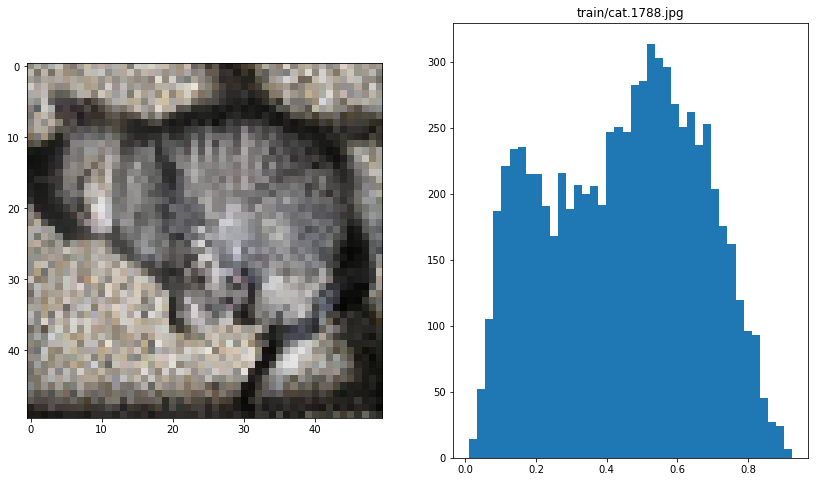

In [6]:

index_example = 32
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax[0].imshow(train_features[index_example,].transpose((1,2,0)))
ax[1].set_title(train_files[index_example])
_ = ax[1].hist(train_features[index_example,].ravel(),bins=40)


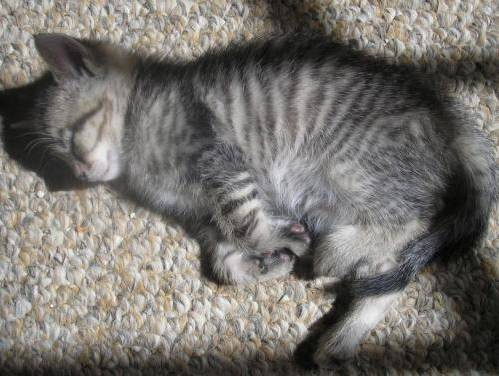

In [7]:
from IPython.display import Image,display

display(Image(train_files[index_example]))

## Preprocessing

In [8]:
#media = np.mean(train_features,axis=(0,2,3),keepdims=True)
#print(media.shape,media.ravel())

#media = media[:,np.newaxis,np.newaxis]
#train_features-=media
#val_features-=media
#test_features-=media

In [9]:
from keras.applications.imagenet_utils import preprocess_input

preprocesado = False

if not preprocesado:
    train_features*=255
    val_features*=255
    test_features*=255
    train_features = preprocess_input(train_features)
    val_features = preprocess_input(val_features)
    test_features = preprocess_input(test_features)
    preprocesado = True


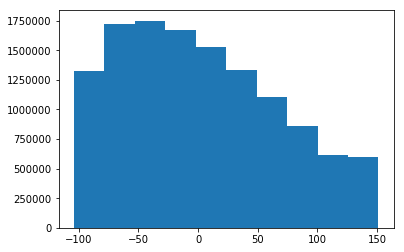

In [10]:
# blue channel
_ = plt.hist(train_features[:,0,:,:].ravel())

## FC network

`keras` notation:
* *epoch*:  Each epoch is a full loop over **all** the training data.
* `nb_epoch`: Number of epochs to train the model. 
* `batch_size`: Number of samples to use in each *stochastic* gradient update.

For example, 80 epochs consist on 80 loops over all the training examples. If there are 1000 examples and batch size is set to 32 there will be 1000/32 * 80 gradient updates. Each gradient is estimated using 32 samples.

In [11]:
input_shape_flat = np.prod(input_image_shape)
train_features_flat = train_features.reshape((train_features.shape[0],input_shape_flat))
val_features_flat = val_features.reshape((val_features.shape[0],input_shape_flat))
test_features_flat = test_features.reshape((test_features.shape[0],input_shape_flat))
print(train_features_flat.shape,val_features_flat.shape,test_features_flat.shape)

(5000, 7500) (500, 7500) (500, 7500)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

train_fc_model = True

if train_fc_model:
    fc_model = Sequential([
        Dense(1024, input_dim=input_shape_flat),
        Activation('sigmoid'),
        Dense(512),
        Activation('sigmoid'),
        Dense(256),
        Activation('sigmoid'),
        Dense(1),
        Activation('sigmoid')
    ])

    fc_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    nb_epoch=20
    hist=fc_model.fit(train_features_flat,
                      train_labels, 
                      nb_epoch=nb_epoch,validation_data=(val_features_flat,
                                                   val_labels),
                      batch_size=32,verbose=2)

    fc_model.save("fc_model.h5")
else:
    fc_model = keras.models.load_model("fc_model_trained.h5")
    

Train on 5000 samples, validate on 500 samples
Epoch 1/20
1s - loss: 0.6997 - acc: 0.5240 - val_loss: 0.6917 - val_acc: 0.5400
Epoch 2/20
1s - loss: 0.6883 - acc: 0.5364 - val_loss: 0.6727 - val_acc: 0.5740
Epoch 3/20
1s - loss: 0.6799 - acc: 0.5640 - val_loss: 0.6716 - val_acc: 0.5800
Epoch 4/20
1s - loss: 0.6766 - acc: 0.5708 - val_loss: 0.6907 - val_acc: 0.5720
Epoch 5/20
1s - loss: 0.6741 - acc: 0.5704 - val_loss: 0.6753 - val_acc: 0.5660
Epoch 6/20
1s - loss: 0.6696 - acc: 0.5764 - val_loss: 0.6950 - val_acc: 0.5440
Epoch 7/20
1s - loss: 0.6675 - acc: 0.5836 - val_loss: 0.6639 - val_acc: 0.5980
Epoch 8/20
1s - loss: 0.6617 - acc: 0.5884 - val_loss: 0.6627 - val_acc: 0.6320
Epoch 9/20
1s - loss: 0.6603 - acc: 0.5890 - val_loss: 0.6639 - val_acc: 0.6080
Epoch 10/20
1s - loss: 0.6583 - acc: 0.6008 - val_loss: 0.6691 - val_acc: 0.6080
Epoch 11/20
1s - loss: 0.6510 - acc: 0.6120 - val_loss: 0.6684 - val_acc: 0.6020
Epoch 12/20
1s - loss: 0.6441 - acc: 0.6140 - val_loss: 0.6780 - val_ac

In [13]:
fc_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1024)          7681024     dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 1024)          0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           524800      activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 512)           0           dense_2[0][0]                    
___________________________________________________________________________________________

In [14]:
if train_fc_model:
    hist.history

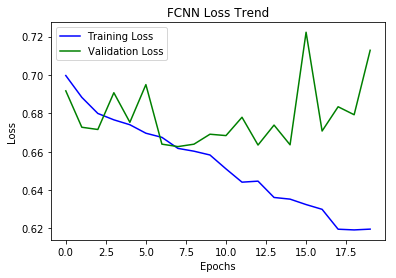

In [15]:
if train_fc_model:
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('FCNN Loss Trend')
    plt.plot(hist.history["loss"], 'blue', label='Training Loss')
    plt.plot(hist.history["val_loss"], 'green', label='Validation Loss')
    #plt.xticks(range(0,nb_epoch,2))
    plt.legend()

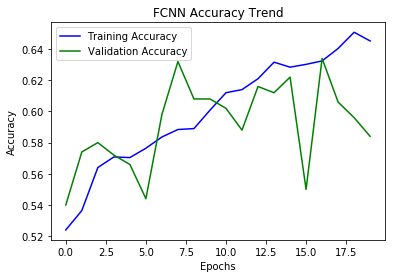

In [16]:
if train_fc_model:
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('FCNN Accuracy Trend')
    plt.plot(hist.history["acc"], 'blue', label='Training Accuracy')
    plt.plot(hist.history["val_acc"], 'green', label='Validation Accuracy')
    plt.legend()

In [17]:
results = fc_model.evaluate(test_features_flat,test_labels)
print("")
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(fc_model.metrics_names,results)]))

448/500 [=========================>....] - ETA: 0s
loss: 0.6922 acc: 0.5620


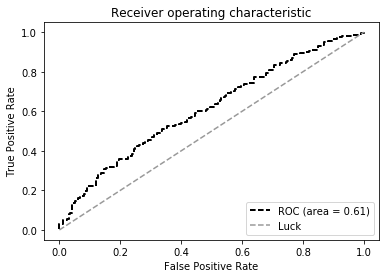

In [18]:
preds = fc_model.predict(test_features_flat)
dvc.plotROC(test_labels,preds)

## CNN

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

train_cnn_model = True
def catdog_cnn(input_image_shape):
    model = Sequential()
    model.add(Convolution2D(32, 3, 3,input_shape=input_image_shape))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(64, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.add(Activation('sigmoid'))
    optimizer = Adam()
    objective = 'binary_crossentropy'
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

if train_cnn_model:
    cnn_model = catdog_cnn(input_image_shape)
else:
    cnn_model = keras.models.load_model("cnn_model_trained.h5")
cnn_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 48, 48)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 32, 48, 48)    128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 32, 48, 48)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 46, 46)    9248        activation_5[0][0]               
___________________________________________________________________________________________

In [20]:
if train_cnn_model:
    nb_epoch=80
    print("Model compiled, start training")
    early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, 
                                            verbose=1, mode='auto')
    history = cnn_model.fit(train_features, train_labels,validation_data=(val_features,val_labels),
                            batch_size=32, nb_epoch=nb_epoch,verbose=2,callbacks=[early_stopping_callback])
    cnn_model.save("cnn_model.h5")


Model compiled, start training
Train on 5000 samples, validate on 500 samples
Epoch 1/80
7s - loss: 0.7589 - acc: 0.5602 - val_loss: 0.6385 - val_acc: 0.6440
Epoch 2/80
7s - loss: 0.6506 - acc: 0.6336 - val_loss: 0.6186 - val_acc: 0.6760
Epoch 3/80
7s - loss: 0.6131 - acc: 0.6638 - val_loss: 0.5961 - val_acc: 0.6680
Epoch 4/80
7s - loss: 0.5844 - acc: 0.6978 - val_loss: 0.5093 - val_acc: 0.7700
Epoch 5/80
7s - loss: 0.5272 - acc: 0.7454 - val_loss: 0.5205 - val_acc: 0.7420
Epoch 6/80
8s - loss: 0.4820 - acc: 0.7686 - val_loss: 0.8125 - val_acc: 0.6420
Epoch 7/80
8s - loss: 0.4601 - acc: 0.7824 - val_loss: 0.4479 - val_acc: 0.7920
Epoch 8/80
8s - loss: 0.4191 - acc: 0.8098 - val_loss: 0.4611 - val_acc: 0.7860
Epoch 9/80
8s - loss: 0.3980 - acc: 0.8210 - val_loss: 0.4202 - val_acc: 0.8080
Epoch 10/80
7s - loss: 0.3735 - acc: 0.8342 - val_loss: 0.4208 - val_acc: 0.8060
Epoch 11/80
7s - loss: 0.3264 - acc: 0.8566 - val_loss: 0.4564 - val_acc: 0.8100
Epoch 12/80
8s - loss: 0.3179 - acc: 0.8

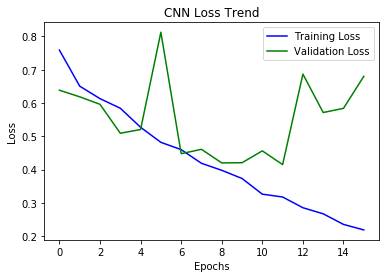

In [25]:
if train_cnn_model:
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('CNN Loss Trend')
    plt.plot(history.history["loss"], 'blue', label='Training Loss')
    plt.plot(history.history["val_loss"], 'green', label='Validation Loss')
    #plt.xticks(range(0,nb_epoch,2))
    plt.legend(loc="best")

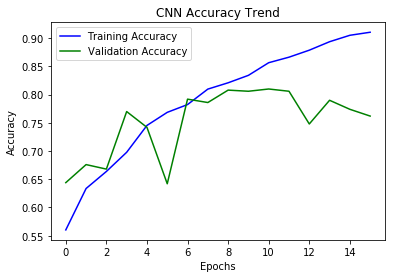

In [26]:
if train_cnn_model:
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('CNN Accuracy Trend')
    plt.plot(history.history["acc"], 'blue', label='Training Accuracy')
    plt.plot(history.history["val_acc"], 'green', label='Validation Accuracy')
    plt.legend(loc="best")

In [27]:
# evaluate the model
results = cnn_model.evaluate(test_features,test_labels)
print("")
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(cnn_model.metrics_names,results)]))

500/500 [==============================] - 0s     

loss: 0.6387 acc: 0.7700


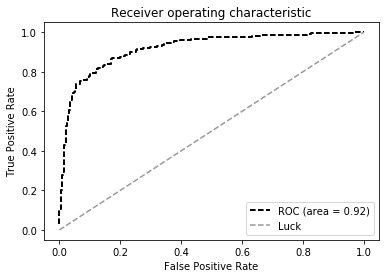

In [28]:
preds = cnn_model.predict(test_features)
dvc.plotROC(test_labels,preds)

Things to explore:
* Use more data.
* Data augmentation. [ImageDataGenerator](https://keras.io/preprocessing/image/)
* Icrease regularization
* Save best model (instead of geting the latest) [ModelCheckPoint](https://keras.io/callbacks/)
* Test differences running in gpu vs cpu.